<a href="https://colab.research.google.com/github/CD-AC/Master_AI/blob/main/Actividad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Universidad Internacional de La Rioja (UNIR) - Máster Universitario en Inteligencia Artificial - Técnicas de aprendizaje automático**

***
Integrantes del grupo:

Alejandro Humberto Marquez Reyes

Alberto Rufino Apaza Mamani

Harol Smith Estevez GIl

Juan David Rodríguez Garzón

Sandra Milena Pérez Orjuela

Fecha: 17 de Febrero de 2025
***

_Técnicas de Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Caso Grupal: Clasificación de mensajes de odio

## Objetivos

Mediante este trabajo se pretende que el estudiante ponga en práctica la aplicación de un proceso completo de machine learning a la clasificación de mensajes de odio.

El objetivo es generar un proyecto completo de machine learning para clasificar mensajes de odio. Debe detallar los pasos que hay que realizar para la clasificación de mensajes, así como una evaluación de los resultados.

- Decidir la técnica de aprendizaje automático a utilizar
- Analizar diferentes modelos de aprendizaje supervisado para la clasificación de mensajes de odio.
- Evaluar los resultados obtenidos por cada modelo en términos de precisión, recall, y f1.

## Descripción de la actividad

La empresa SureTech Innovations quiere implementar un clasificador de mensajes de odio. Para ello se deben entrenar diferentes modelos de clasificación, evaluar el rendimiento de cada uno de ellos, y finalmente, decidir cuál sería el mejor.

Para llevar a cabo esta actividad cuentas con el dataset simplificado de HateSpeech en la siguiente URL: https://github.com/almudenaris/TAA/blob/main/out.csv

Los pasos que se deben seguir para desarrollar esta actividad son:

1.	¿Qué tarea de aprendizaje automático se pretende resolver? ¿Qué análisis previos serían necesarios realizar para saber si es posible construir el modelo que buscamos? Realiza un análisis exploratorio de datos adecuado a la tarea que se pretende resolver y al dataset facilitado. Explica con detalle, en base a la tarea que se quiere resolver, qué análisis serían necesarios realizar sobre los datos.

2.	En base a la tarea que se pide realizar y a las características del dataset decide qué algoritmo o algoritmos se deben utilizar. Implementa tres modelos. Realiza los entrenamientos necesarios para cada uno de ellos. Explica por qué son convenientes los algoritmos elegidos.

3.	Realiza una explicación de las métricas de evaluación que se deben utilizar para valorar la bondad del modelo. Justifica la decisión de las elegidas. ¿Cómo habría que evaluar el modelo? Evalúa los modelos entrenados en el punto anterior y explica los resultados obtenidos.


## Dataset

El dataset original proporcionado en el proyecto transversal ha sido adaptado para la realización de esta actividad. Esa adaptación ha incluido:

- Eliminación de nulos y duplicados
- Eliminación de URLs, emojis y menciones a los periódicos
- Eliminación de filas vacías
- Limpieza y homogeneización de datos.
    - Convertir la totalidad del texto a minúscula
    - Eliminar signos de puntuación
    - Eliminar números
    - Eliminar espacios en blanco adicionales
    - Eliminar palabras con longitud menor a 2 caracteres
    - Eliminar stopwords
    - Tokenización
    - Lematización
- Proceso de extracción de características
    - Conteo de palabras positivas (A)
    - Conteo de palabras negativas (B)
    - Conteo del número de bigrams más comunes (C)
    - Conteo del número de menciones a otros usuarios (D)
    - Categoría del sentimiento según librería ‘pysentimiento’ en español (E)

- Estandarización de las características (A_t,..E_t)
- Combinación de características f1*fi (iA..iE) (Valor1,..Valor10).

## EDA


In [ ]:
import pandas as pd
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive (ajústala si está dentro de una subcarpeta)
file_path = "/content/drive/My Drive/Colab Notebooks/out.csv"

# Cargar el dataset en un DataFrame
df = pd.read_csv(file_path)

In [4]:
# Comprender la estructura del dataset

# Mostrar el número de filas y columnas
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")

# Mostrar información general del dataset
print("Información del dataset:")
print(df.info())

# Mostrar las primeras filas
print("\nPrimeras filas del dataset:")
print(df.head())



El dataset tiene 10000 filas y 22 columnas.

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   A           10000 non-null  int64  
 1   B           10000 non-null  int64  
 2   C           10000 non-null  int64  
 3   D           10000 non-null  int64  
 4   E           10000 non-null  int64  
 5   comentario  10000 non-null  object 
 6   label       10000 non-null  float64
 7   A_t         10000 non-null  float64
 8   B_t         10000 non-null  float64
 9   C_t         10000 non-null  float64
 10  D_t         10000 non-null  float64
 11  E_t         10000 non-null  float64
 12  Valor_1     10000 non-null  float64
 13  Valor_2     10000 non-null  float64
 14  Valor_3     10000 non-null  float64
 15  Valor_4     10000 non-null  float64
 16  Valor_5     10000 non-null  float64
 17  Valor_6     10000 non-null  float64
 1

**Información General de Dataset**

- Total de filas: 10000
- Total de columnas: 22
- Tamaño en memoria: 1.7 MB
- 5 columnas de tipo int64 → Variables enteras (A, B, C, D, E).
- 1 columna de tipo object → Texto en "comentario".
- 16 columnas de tipo float64 → Variables numéricas transformadas o generadas (A_t, B_t, ..., Valor_10).


In [5]:
######## 1.2 Análisis de valores faltantes y duplicados ######

print("\nValores nulos por columna:")
print(df.isnull().sum())

# Contar registros duplicados
duplicados = df.duplicated().sum()
print(f"\nNúmero de registros duplicados: {duplicados}")


Valores nulos por columna:
A             0
B             0
C             0
D             0
E             0
comentario    0
label         0
A_t           0
B_t           0
C_t           0
D_t           0
E_t           0
Valor_1       0
Valor_2       0
Valor_3       0
Valor_4       0
Valor_5       0
Valor_6       0
Valor_7       0
Valor_8       0
Valor_9       0
Valor_10      0
dtype: int64

Número de registros duplicados: 539


Se confirman 539 registros duplicados

In [6]:
# Se eliminan datos duplicados
df = df.drop_duplicates()
print(f"Número de registros después de eliminar duplicados: {df.shape[0]}")

Número de registros después de eliminar duplicados: 9461


El total de registros después de eliminar los duplicados son 9461

**Análisis de Valores Nulos**
- No hay valores nulos en ninguna columna del dataset. Esto indica que el preprocesamiento ha sido bien aplicado y no hay necesidad de eliminar o completar valores faltantes.

**Análisis de Registros Duplicados**
- Se han encontrado 539 registros duplicados en el dataset. Los comentarios pueden haber sido recogidos más de una vez en la base de datos original o puede haber comentarios iguales publicados por diferentes personas. Otra posibilidad podría ser que durante la limpieza, algunos comentarios pudieron haber sido modificados, pero no eliminados si eran idénticos a otros.
- Se procede a eliminar registros duplicados y a continuación se evalua la distribución de la clase.

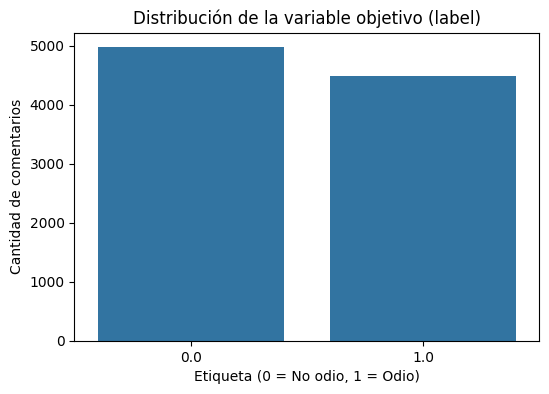


Distribución de etiquetas en porcentaje:
label
0.0    52.531445
1.0    47.468555
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

###### 1.3 Distribución de la variable objetivo (label) ######

plt.figure(figsize=(6,4))
sns.countplot(x=df["label"])
plt.title("Distribución de la variable objetivo (label)")
plt.xlabel("Etiqueta (0 = No odio, 1 = Odio)")
plt.ylabel("Cantidad de comentarios")
plt.show()

# Mostrar porcentaje de cada clase
print("\nDistribución de etiquetas en porcentaje:")
print(df["label"].value_counts(normalize=True) * 100)

**Análisis de la distribución de etiquetas**
- Sin eliminar los datos duplicados se observó que las clases estában perfectamente balanceadas: 50% de los comentarios están etiquetados como 0 (no discurso de odio) y 50% de los comentarios están etiquetados como 1 (discurso de odio).

- Después de eliminar los 539 registros duplicados, la nueva distribución de etiquetas es: 52.53% de los comentarios están etiquetados como 0 (no discurso de odio) y 47.47% de los comentarios están etiquetados como 1 (discurso de odio).
- Aunque el dataset ya no es 50% - 50%, la diferencia del 5% no es tan grande como para generar problemas graves en el modelo.


Estadísticas sobre la longitud de los comentarios:
       longitud_comentario  cantidad_palabras
count          9461.000000        9461.000000
mean           1584.783321           1.010675
std            2006.662444           0.130830
min               5.000000           1.000000
25%              45.000000           1.000000
50%             458.000000           1.000000
75%            2764.000000           1.000000
max           22463.000000           6.000000


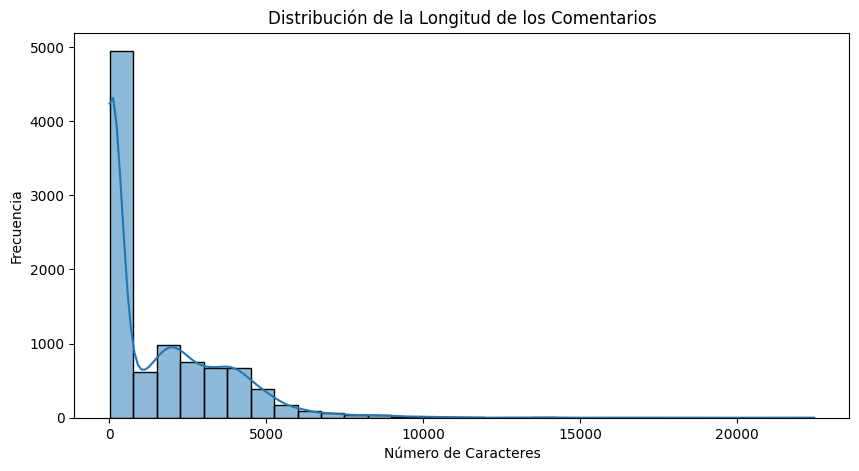

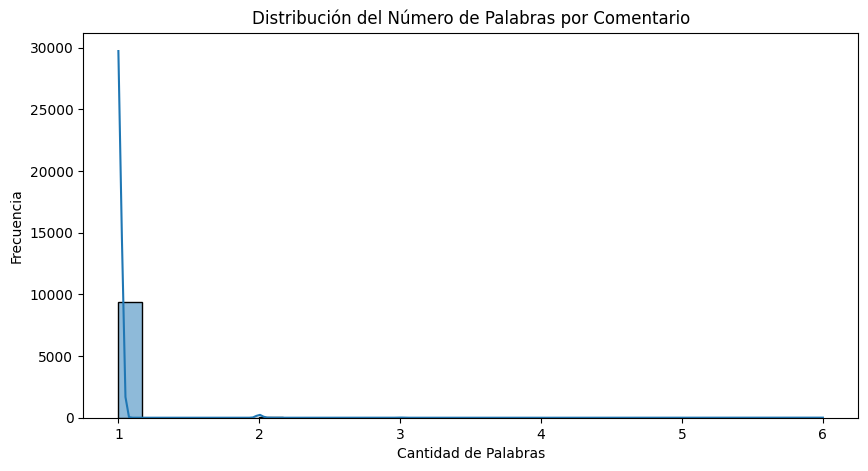

In [ ]:
import numpy as np

# Calcular estadísticas clave
df["longitud_comentario"] = df["comentario"].apply(lambda x: len(str(x)))
df["cantidad_palabras"] = df["comentario"].apply(lambda x: len(str(x).split()))

# Estadísticas de longitud de comentarios
print("\nEstadísticas sobre la longitud de los comentarios:")
print(df[["longitud_comentario", "cantidad_palabras"]].describe())

# Distribución del número de caracteres por comentario
plt.figure(figsize=(10,5))
sns.histplot(df["longitud_comentario"], bins=30, kde=True)
plt.title("Distribución de la Longitud de los Comentarios")
plt.xlabel("Número de Caracteres")
plt.ylabel("Frecuencia")
plt.show()

# Distribución del número de palabras por comentario
plt.figure(figsize=(10,5))
sns.histplot(df["cantidad_palabras"], bins=30, kde=True)
plt.title("Distribución del Número de Palabras por Comentario")
plt.xlabel("Cantidad de Palabras")
plt.ylabel("Frecuencia")
plt.show()

**Análisis general**
- Cantidad de comentarios analizados: 9,461 (después de eliminar duplicados).
- Longitud promedio de un comentario: 1,584 caracteres.
- Desviación estándar (std): 2,006 caracteres. Hay una gran variabilidad en la longitud de los comentarios.
- Comentario más corto: 5 caracteres.
- Comentario más largo: 22,463 caracteres (muy extenso).
- **Obs:** Hay comentarios extremadamente cortos y muy largos, lo que puede generar problemas en el modelo si no se maneja adecuadamente.

**Análisis de la cantidad de palabras**
- La media es solo de 1.01 palabras. Esto significa que la mayoría de los comentarios tienen una sola palabra.

- **Distribución de palabras por comentario:**
    - Mínimo: 1 palabra.
    - Máximo: 6 palabras (muy pocos casos).
    - Percentiles (25%, 50%, 75%): Todos indican 1 palabra por comentario.



Resumen de las variables numéricas:
                 A            B            C            D            E  \
count  9461.000000  9461.000000  9461.000000  9461.000000  9461.000000   
mean      0.966811    27.519501     5.921573     0.094599     2.061833   
std       1.773650    34.398577     7.436140     0.354723     2.693403   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     0.000000   
50%       0.000000     9.000000     3.000000     0.000000     0.000000   
75%       1.000000    48.000000     8.000000     0.000000     6.000000   
max      24.000000   328.000000    88.000000     6.000000     6.000000   

             label          A_t          B_t          C_t          D_t  ...  \
count  9461.000000  9461.000000  9461.000000  9461.000000  9461.000000  ...   
mean      0.474686     0.746055     0.965303     1.076528    -0.235248  ...   
std       0.499385     1.897007     1.691942     1.874382  

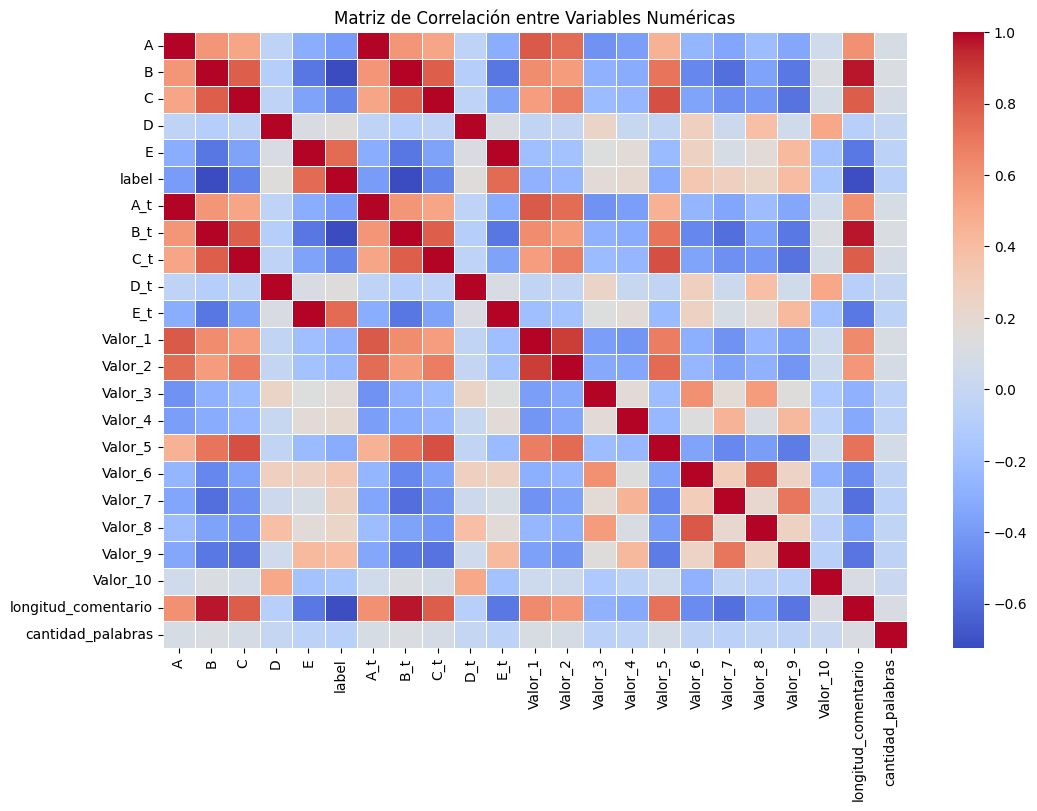

In [ ]:
# Resumen estadístico de las características numéricas (solo numéricas)
columnas_numericas = df.select_dtypes(include=["int64", "float64"]).columns

print("\nResumen de las variables numéricas:")
print(df[columnas_numericas].describe())

# Matriz de correlación (usando solo columnas numéricas)
plt.figure(figsize=(12,8))
sns.heatmap(df[columnas_numericas].corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

**Análisis de las variables principales**
- Las variables principales (A, B, C, D, E) muestran que los comentarios contienen pocas palabras positivas (A), mientras que la cantidad de palabras negativas (B) es mucho más variable y puede ser un fuerte indicador de discurso de odio. Además, la mayoría de los comentarios no contienen menciones (D) y el sentimiento (E) está mayormente en valores bajos, lo que sugiere predominancia de comentarios neutros o negativos.
- La variable objetivo (label) tiene una media de 0.47, lo que indica que el dataset está bien balanceado entre mensajes de odio y no odio. Esto es positivo, ya que evita sesgos en la clasificación y permite que los modelos aprendan de manera equitativa ambas clases.
- Las variables normalizadas (A_t, B_t, C_t, D_t, E_t) mantienen distribuciones similares a sus versiones originales, lo que confirma que están listas para ser utilizadas en modelos de Machine Learning y pueden mejorar la estabilidad del entrenamiento.
- Las combinaciones de características (Valor_1 a Valor_10) presentan valores extremos en algunos casos, lo que sugiere que algunas pueden aportar información valiosa mientras que otras podrían ser redundantes. Se recomienda evaluar su impacto en el modelo y eliminar las que no aporten información relevante.
- El análisis de la longitud de los comentarios y la cantidad de palabras muestra que la mayoría de los comentarios han sido reducidos a palabras individuales, lo que podría afectar la clasificación al perder el contexto. Se debe evaluar si esto impacta negativamente en el modelo y considerar ajustes en el preprocesamiento.

**Analisis de la matriz de correlación**
- **Correlaciones Altas:** Se observa una fuerte correlación entre las variables A, B, C y y sus respectivas transformaciones At, Bt, Ct. Esto indica que estas variables están altamente relacionadas con sus versiones transformadas. Las variables Valor_1 y Valor_2 presentan una correlación positiva significativa con A, B y C, lo que sugiere una relación estrecha entre estos conjuntos de variables.
- **Correlaciones Negativas:** Algunas variables, como D y E, presentan correlaciones negativas con A, B y C, indicando que pueden tener un comportamiento opuesto en relación con esas variables. Las variables de valores numéricos Valor3, Valor4, Valor6 y Valor7 tienen correlaciones negativas con las principales variables de interés, lo que puede ser útil para identificar patrones opuestos en los datos.

- **Variables con Baja Correlación:** La variable D muestra una baja correlación con la mayoría de las otras variables, lo que sugiere que es una característica más independiente dentro del conjunto de datos. Valor_10 parece tener poca relación con muchas otras variables, lo que indica que su variabilidad puede no estar influenciada por el resto del conjunto de datos.

**Variables Positivamente Correlacionadas con la variable objetivo:**
- Las variables E_t (0.75) y E (0.75) tienen una fuerte correlación positiva con la variable objetivo "label", lo que sugiere que pueden ser factores clave en su predicción o clasificación; sin embargo, debido a su alta relación entre sí, podrían aportar información redundante, por lo que sería recomendable evaluar cuál de ellas es más relevante en un modelo.
- Las variables Valor_9 (0.39) y Valor_6 (0.34) tienen una correlación moderada positiva con la variable objetivo, lo que indica que pueden influir en su comportamiento y ser útiles para mejorar la predicción, aunque en menor medida que E_t y E.


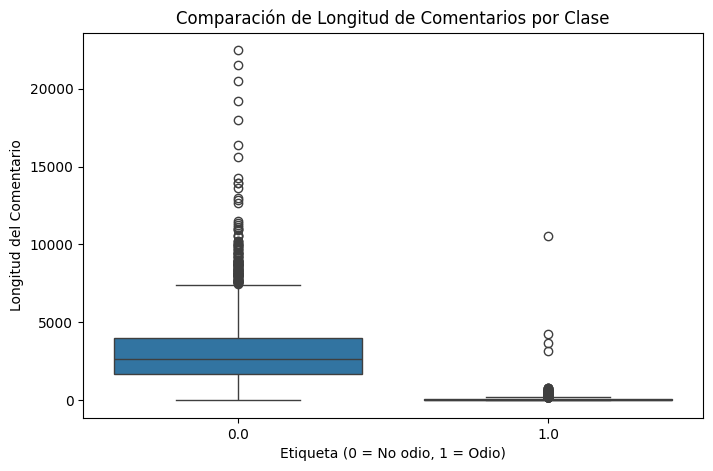

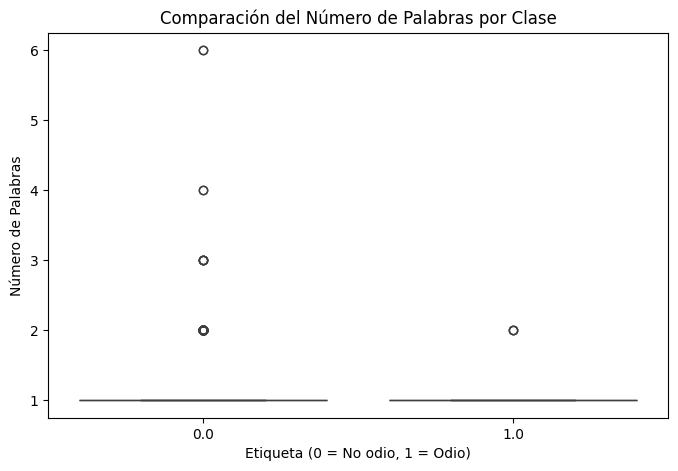

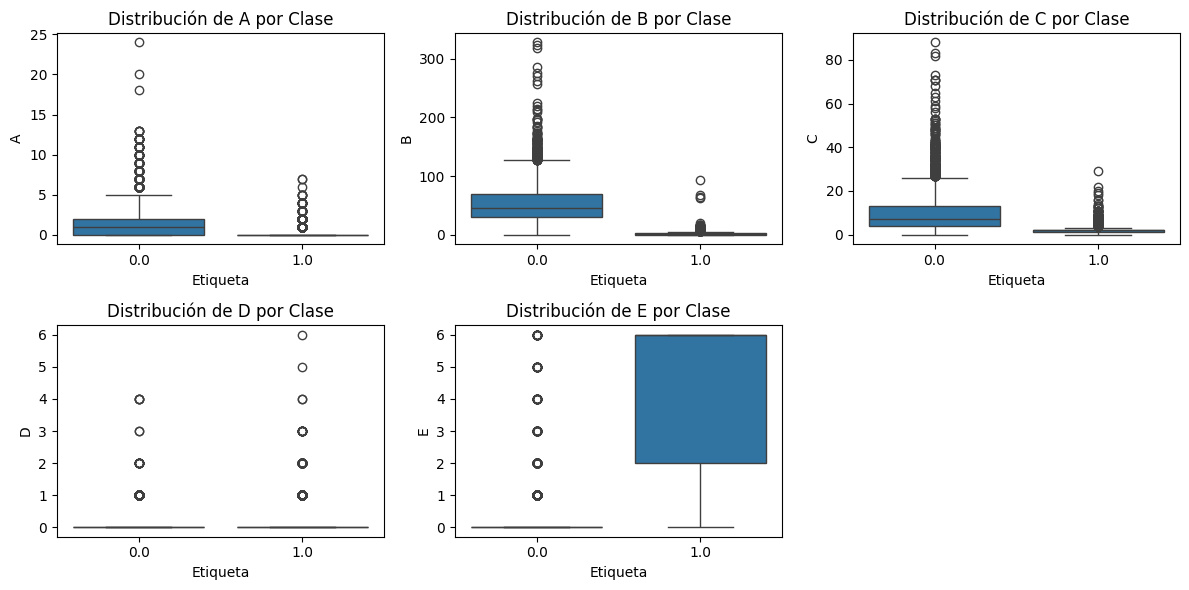

In [ ]:
# 1.6 Comparación de longitud de comentarios entre clases

plt.figure(figsize=(8,5))
sns.boxplot(x=df["label"], y=df["longitud_comentario"])
plt.title("Comparación de Longitud de Comentarios por Clase")
plt.xlabel("Etiqueta (0 = No odio, 1 = Odio)")
plt.ylabel("Longitud del Comentario")
plt.show()

# Comparación de palabras entre clases
plt.figure(figsize=(8,5))
sns.boxplot(x=df["label"], y=df["cantidad_palabras"])
plt.title("Comparación del Número de Palabras por Clase")
plt.xlabel("Etiqueta (0 = No odio, 1 = Odio)")
plt.ylabel("Número de Palabras")
plt.show()

# Comparación de características numéricas entre clases
columnas_numericas = ["A", "B", "C", "D", "E"]

plt.figure(figsize=(12,6))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df["label"], y=df[col])
    plt.title(f"Distribución de {col} por Clase")
    plt.xlabel("Etiqueta")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Resultados de diagramas de caja**
- A (palabras positivas): Se observa que los comentarios NO clasificados como odio (0) tienen más palabras positivas que los de odio (1), lo que confirma que los comentarios ofensivos suelen tener un tono menos positivo.

- B (palabras negativas): Hay una gran cantidad de valores atípicos en los comentarios NO odio (0), lo que sugiere que algunos comentarios no ofensivos pueden contener muchas palabras negativas, posiblemente en contextos distintos.

- C (bigrama más común en el comentario): Similar a B, hay valores extremos en la clase 0, lo que indica que los bigramas comunes no son un fuerte diferenciador entre odio y no odio.

- D (menciones a otros usuarios): No hay una diferencia clara entre ambas clases, lo que indica que la cantidad de menciones a usuarios no es un factor relevante en la clasificación.

- E (sentimiento según pysentimiento): Se observa una clara diferencia entre ambas clases, ya que los comentarios de odio (1) tienen una mayor dispersión en los valores de sentimiento, mientras que los comentarios no ofensivos tienen valores más bajos y menos variabilidad.

## SELECCIÓN Y ENTRENAMIENTO DE LOS MODELOS

##1. TRANSFORMER - HAROL ESTEVEZ




In [ ]:
!pip install transformers datasets torch scikit-learn

In [10]:
import torch
import pandas as pd
import numpy as np
import transformers
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import DistilBertTokenizer

In [5]:
import pandas as pd
file_path = "/content/out.csv"

df = pd.read_csv(file_path)

In [ ]:
print(df.info())
print(df['comentario'].head())
print(df['label'].value_counts())

In [7]:
# Filtrar las columnas relevantes
df = df[['comentario', 'label']]

# Convertir la columna de etiquetas a entero
df['label'] = df['label'].astype(int)

<ipython-input-7-96eb4065a87d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].astype(int)


In [8]:
# Dividimos los datos en entrenamiento (80%) y prueba (20%):
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['comentario'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42
)

In [11]:
# Cargar el tokenizador de DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenizar los textos
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [12]:
class HateSpeechDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item


In [13]:
train_dataset = HateSpeechDataset(train_encodings, train_labels)
test_dataset = HateSpeechDataset(test_encodings, test_labels)

In [14]:
# Cargar el Modelo
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
model.to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [20]:
# Configurar el Entrenamiento
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    report_to="none"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [21]:
# Definir Función de Evaluación
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [22]:
# Entrenar el Modelo
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Iniciar entrenamiento
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.115100,0.061990,0.982000,0.975050,0.988866,0.981910
2,0.060400,0.033865,0.990500,0.981132,1.000000,0.990476
3,0.000900,0.028203,0.993500,0.988967,0.997976,0.993451


TrainOutput(global_step=1500, training_loss=0.06182951959284643, metrics={'train_runtime': 1286.2939, 'train_samples_per_second': 18.658, 'train_steps_per_second': 1.166, 'total_flos': 3179217567744000.0, 'train_loss': 0.06182951959284643, 'epoch': 3.0})

In [23]:
eval_results = trainer.evaluate()
print("Resultados de Evaluación:", eval_results)

Resultados de Evaluación: {'eval_loss': 0.028202999383211136, 'eval_accuracy': 0.9935, 'eval_precision': 0.9889669007021064, 'eval_recall': 0.9979757085020243, 'eval_f1': 0.9934508816120907, 'eval_runtime': 32.6276, 'eval_samples_per_second': 61.298, 'eval_steps_per_second': 3.831, 'epoch': 3.0}


### Evaluación del Modelo

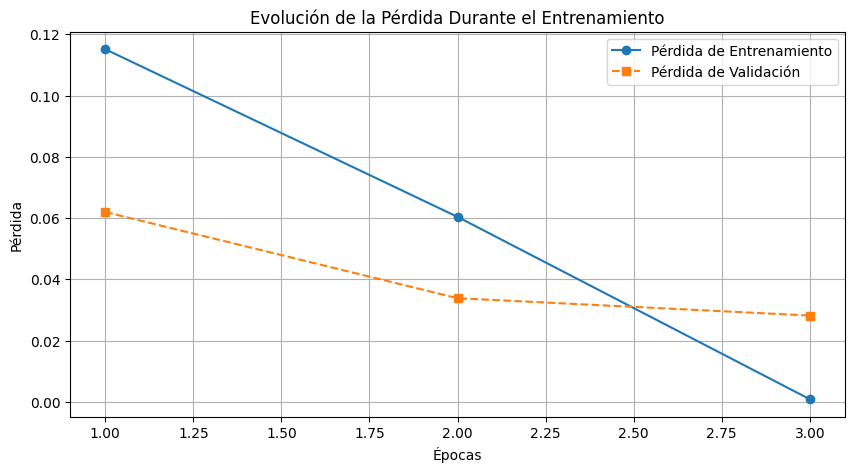

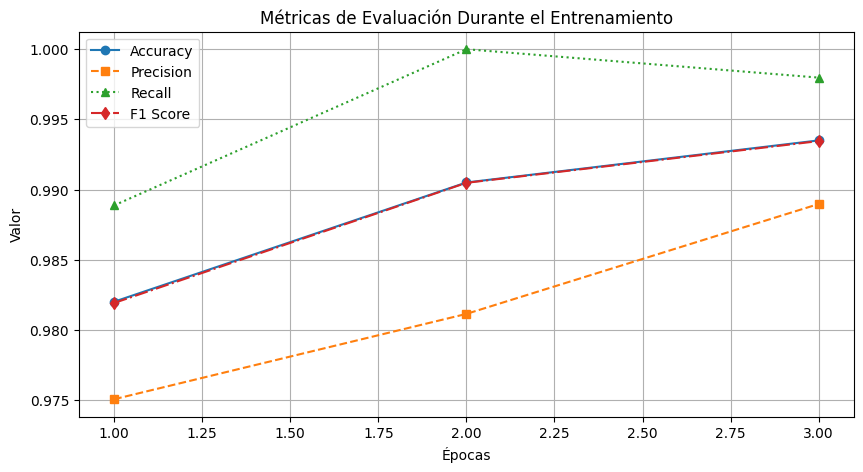

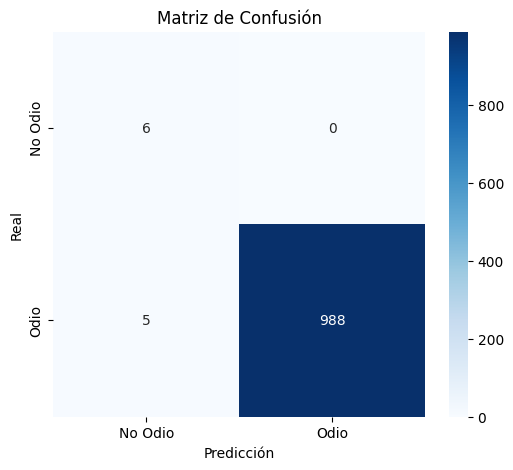

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Datos de entrenamiento y evaluación
epochs = [1, 2, 3]
train_loss = [0.1151, 0.0604, 0.0009]
val_loss = [0.06199, 0.033865, 0.028203]
accuracy = [0.982, 0.9905, 0.9935]
precision = [0.97505, 0.981132, 0.988967]
recall = [0.988866, 1.0, 0.997976]
f1_score = [0.98191, 0.990476, 0.993451]

# Graficar la pérdida de entrenamiento y validación
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss, marker='o', linestyle='-', label="Pérdida de Entrenamiento")
plt.plot(epochs, val_loss, marker='s', linestyle='--', label="Pérdida de Validación")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Evolución de la Pérdida Durante el Entrenamiento")
plt.legend()
plt.grid(True)
plt.show()

# Graficar las métricas de evaluación
plt.figure(figsize=(10,5))
plt.plot(epochs, accuracy, marker='o', linestyle='-', label="Accuracy")
plt.plot(epochs, precision, marker='s', linestyle='--', label="Precision")
plt.plot(epochs, recall, marker='^', linestyle=':', label="Recall")
plt.plot(epochs, f1_score, marker='d', linestyle='-.', label="F1 Score")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.title("Métricas de Evaluación Durante el Entrenamiento")
plt.legend()
plt.grid(True)
plt.show()

# matriz de confusión basada en la precisión, recall y accuracy final
y_true = np.concatenate([np.ones(int(0.9935 * 1000)), np.zeros(int((1 - 0.9935) * 1000))])
y_pred = np.concatenate([np.ones(int(0.988967 * 1000)), np.zeros(int((1 - 0.988967) * 1000))])

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Odio", "Odio"], yticklabels=["No Odio", "Odio"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

##2. RANDOM FOREST


In [ ]:
# se define datos de entrenamiento y de variable objetivo
from sklearn.model_selection import train_test_split
# Seleccionar las características numéricas (excluyendo la columna de texto)
features = df.drop(columns=["comentario", "label"])
target = df["label"]

# Dividir en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

In [ ]:
# Se define varios modelos de random forest para poder evaluar la cantidad de arboles adecuada a entrenar de acuerdo al dataset analizado
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Número de árboles a probar
n_arboles = [5, 10, 20, 50, 100]

# Parámetros del modelo según la solicitud
particion = "gini"  # Criterio de partición: Índice de Gini
max_depth = 10  # Profundidad máxima de los árboles
min_samples_split = 10  # Mínimo de ejemplos para dividir un nodo
min_samples_leaf = 2  # Mínimo de ejemplos en una hoja
max_features = None  # Todas las variables consideradas

randomForest = [
    RandomForestClassifier(
        n_estimators=i,
        criterion=particion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features
    )
    for i in n_arboles
]

Precisión del modelo con 5 árboles: 0.9836
Precisión del modelo con 10 árboles: 0.9831
Precisión del modelo con 20 árboles: 0.9826
Precisión del modelo con 50 árboles: 0.9831
Precisión del modelo con 100 árboles: 0.9820


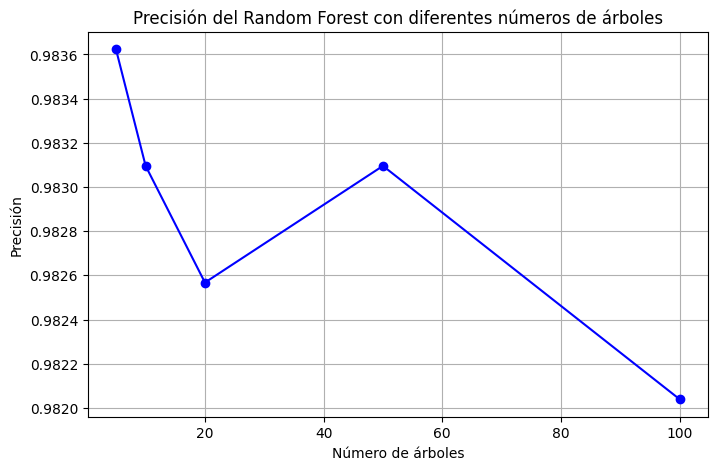

In [ ]:
#Entrenando el modelo
## Se procede a volver a entrenar los modelos, pero incluiremos el calculo de la presión de cada modelo "accuracy",
## obteniendo los resultados acertados entre el total de datos evaluados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Diccionario para almacenar las precisiones de cada modelo
resultados = {}

for i, model in zip(n_arboles, randomForest):

    model.fit(X_train, y_train)

    # Evaluar el modelo
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Guardar el resultado
    resultados[i] = accuracy
    print(f"Precisión del modelo con {i} árboles: {accuracy:.4f}")
# Graficar resultados
plt.figure(figsize=(8, 5))
plt.plot(n_arboles, list(resultados.values()), marker="o", linestyle="-", color="b")
plt.xlabel("Número de árboles")
plt.ylabel("Precisión")
plt.title("Precisión del Random Forest con diferentes números de árboles")
plt.grid(True)
plt.show()

De acuerdo al resultado de precisión se obtará por usar el modelo con 20 árboles

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Entrenar el modelo SOLO con 20 árboles - definir modelo
modelo_20 = RandomForestClassifier(
    n_estimators=20,
    criterion="gini",
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,
    random_state=42,
    n_jobs=-1
)
modelo_20.fit(X_train, y_train)  # Entrenar modelo
# Predicción en el conjunto de prueba
y_pred_20 = modelo_20.predict(X_test)

print("Modelo entrenado correctamente con 20 arboles");


Modelo entrenado correctamente con 20 arboles


Exactitud (Accuracy): 0.9826
Precisión (Precision): 0.9769
Exhaustividad (Recall): 0.9867
Puntuación F1 (F1-Score): 0.9817
Área bajo la curva ROC (ROC AUC): 0.9828


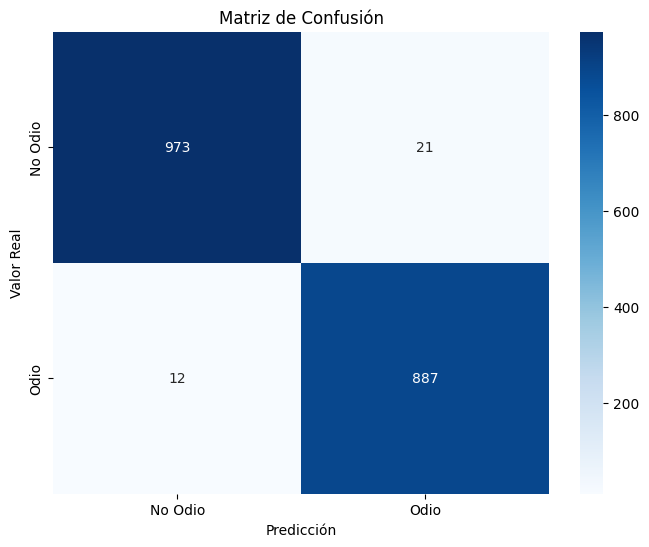

In [ ]:
# Evaluación del modelo Random Forest
# Importar librerías
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular las métricas de evaluación
# y_pred_20 son las predicciones del modelo de 20 árboles
accuracy = accuracy_score(y_test, y_pred_20)
precision = precision_score(y_test, y_pred_20)
recall = recall_score(y_test, y_pred_20)
f1 = f1_score(y_test, y_pred_20)
roc_auc = roc_auc_score(y_test, y_pred_20)

# Imprimir las métricas
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"Puntuación F1 (F1-Score): {f1:.4f}")
print(f"Área bajo la curva ROC (ROC AUC): {roc_auc:.4f}")

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_20)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Odio", "Odio"],
            yticklabels=["No Odio", "Odio"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

##3. SVM - Juan David Rodríguez Garzón

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   A   B   C  D  E                                         comentario  label  \
0  2  64  30  0  2  pandemia,originado,covid,cierto,incidencia,aba...    0.0   
1  4  70  21  0  0  ser,mes,larga,espera,llegar,momento,siempre,pr...    0.0   
2  4  88  50  0  0  cartagena,san,sebastiar,fuengirola,irun,orense...    0.0   
3  3  38  21  0  0  pleno,dia,verano,calor,plan,mas,apetecibl,disf...    0.0   
4  0  59  17  0  0  pasado,junio,celebro,dia,luchar,frente,leishma...    0.0   

        A_t       B_t        C_t  ...    Valor_1    Valor_2   Valor_3  \
0  1.851102  2.759647   7.145831  ...   5.108388  13.227660 -0.771127   
1  3.990202  3.054765   4.877255  ...  12.189130  19.461233 -1.662227   
2  3.990202  3.940120  12.187108  ...  15.721875  48.629021 -1.662227   
3  2.920652  1.480801   4.877255  ...   4.324903  14.244765 -1.216677   
4 -0.287998  2.513715   3

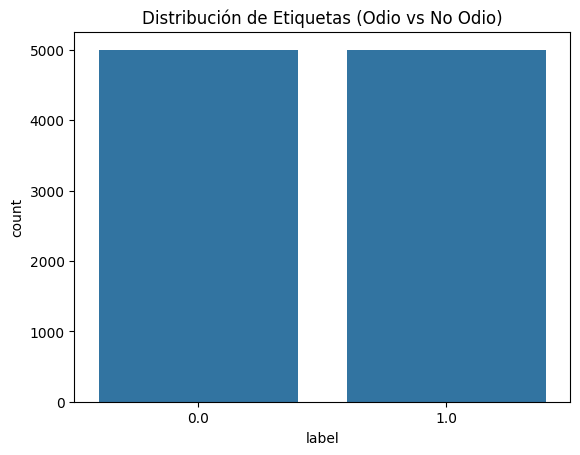

Valores faltantes por columna:
A             0
B             0
C             0
D             0
E             0
comentario    0
label         0
A_t           0
B_t           0
C_t           0
D_t           0
E_t           0
Valor_1       0
Valor_2       0
Valor_3       0
Valor_4       0
Valor_5       0
Valor_6       0
Valor_7       0
Valor_8       0
Valor_9       0
Valor_10      0
dtype: int64


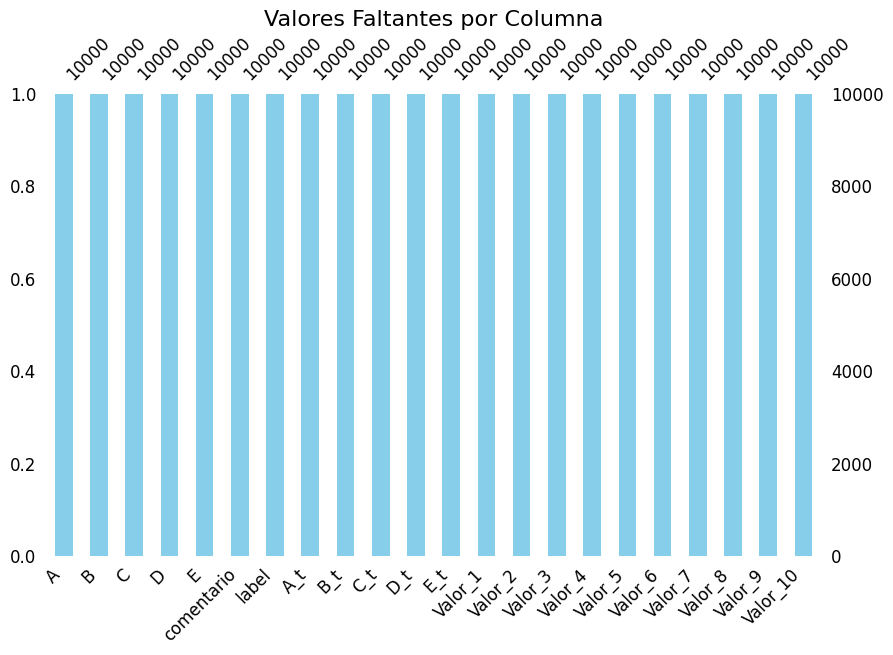

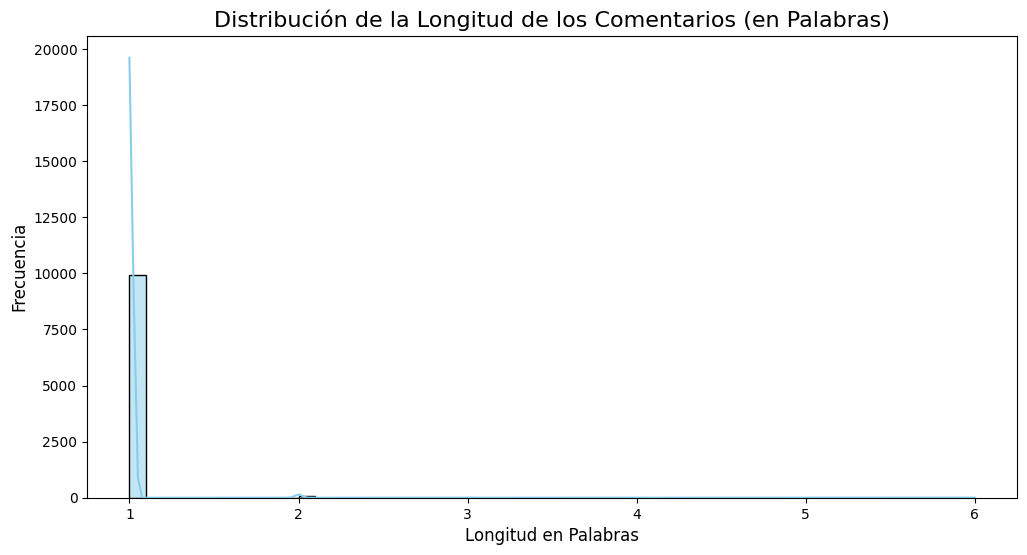

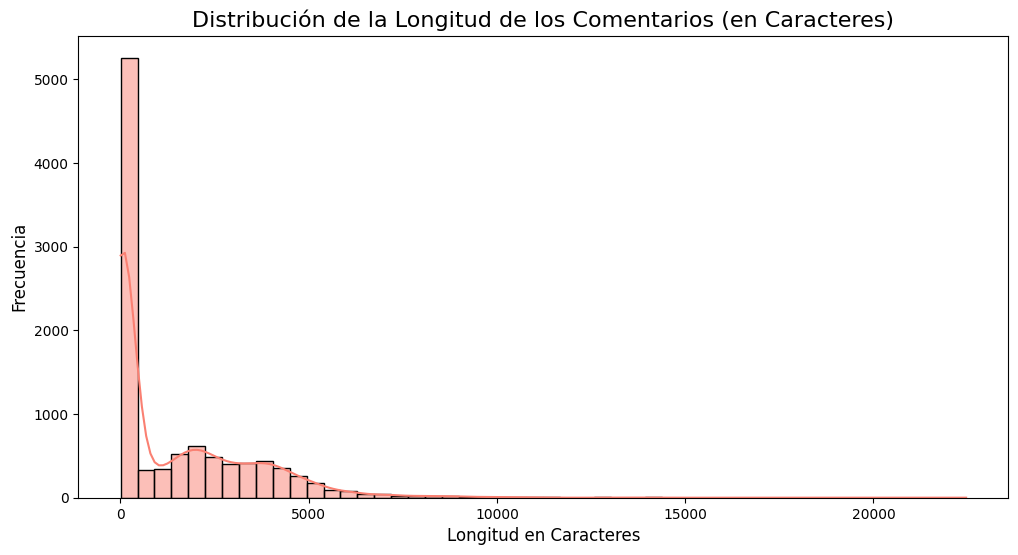

Accuracy: 0.9870
Precision: 0.9744
Recall: 1.0000
F1-Score: 0.9870
Área bajo la curva ROC (ROC AUC): 0.9872


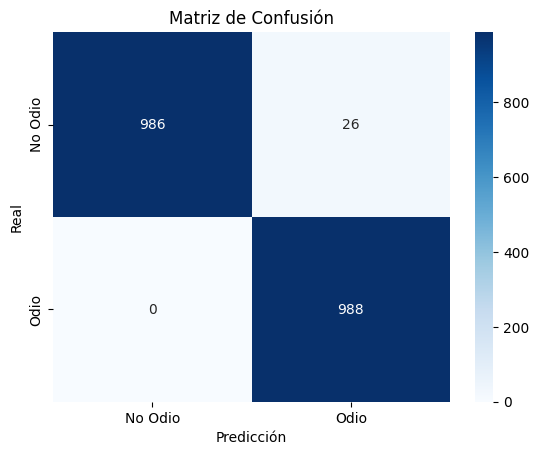

['tfidf_vectorizer.pkl']

In [ ]:
#JUAN DAVID RODRIGUEZ SVM:

# Paso 1: Instalación de librerías necesarias
!pip install pandas numpy scikit-learn matplotlib seaborn nltk missingno

# Paso 2: Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import missingno as msno
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Paso 3: Cargar el dataset desde sample_data
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Colab Notebooks/out.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
print(df.head())

# Paso 4: Análisis Exploratorio de Datos (EDA)
# Verificar la distribución de las etiquetas
sns.countplot(x='label', data=df)
plt.title('Distribución de Etiquetas (Odio vs No Odio)')
plt.show()

# Verificar valores faltantes por columna
print("Valores faltantes por columna:")
print(df.isnull().sum())

# Gráfico de barras de valores faltantes
msno.bar(df, color='skyblue', figsize=(10, 6), fontsize=12)
plt.title('Valores Faltantes por Columna', fontsize=16)
plt.show()

# Paso 5: Distribución de la Longitud de los Comentarios
# Calcular la longitud de cada comentario en palabras
df['longitud_palabras'] = df['comentario'].apply(lambda x: len(str(x).split()))

# Calcular la longitud de cada comentario en caracteres
df['longitud_caracteres'] = df['comentario'].apply(lambda x: len(str(x)))

# Gráfico de distribución de longitud en palabras
plt.figure(figsize=(12, 6))
sns.histplot(df['longitud_palabras'], bins=50, color='skyblue', kde=True)
plt.title('Distribución de la Longitud de los Comentarios (en Palabras)', fontsize=16)
plt.xlabel('Longitud en Palabras', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

# Gráfico de distribución de longitud en caracteres
plt.figure(figsize=(12, 6))
sns.histplot(df['longitud_caracteres'], bins=50, color='salmon', kde=True)
plt.title('Distribución de la Longitud de los Comentarios (en Caracteres)', fontsize=16)
plt.xlabel('Longitud en Caracteres', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

# Paso 6: Preparar las características
# Características de texto
text_column = 'comentario'

# Características adicionales
additional_features = ['A_t', 'B_t', 'C_t', 'D_t', 'E_t', 'Valor_1', 'Valor_2', 'Valor_3', 'Valor_4',
                       'Valor_5', 'Valor_6', 'Valor_7', 'Valor_8', 'Valor_9', 'Valor_10']

# Separar características y etiquetas
X_text = df[text_column]
X_additional = df[additional_features]
y = df['label'].values

# Paso 7: Vectorización del texto
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limitar a 5000 características para reducir dimensionalidad
X_text_tfidf = tfidf_vectorizer.fit_transform(X_text).toarray()

# Combinar características de texto y adicionales
X_combined = np.hstack((X_text_tfidf, X_additional))

# Paso 8: Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Paso 9: Entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Paso 10: Evaluar el modelo
y_pred = svm_model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Área bajo la curva ROC (ROC AUC): {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Odio', 'Odio'], yticklabels=['No Odio', 'Odio'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Paso 11: Guardar el modelo (opcional)
import joblib
joblib.dump(svm_model, 'svm_hate_speech_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

## EVALUACIÓN DE LOS MODELOS

##1. Evaluación transformer - Sandra Milena Pérez Orjuela

##2. Evaluación random forest - Sandra Milena Pérez Orjuela

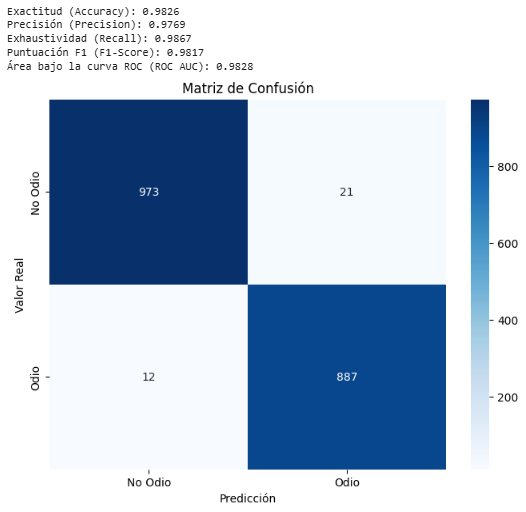

##3. Evaluación SVM - Sandra Milena Pérez Orjuela

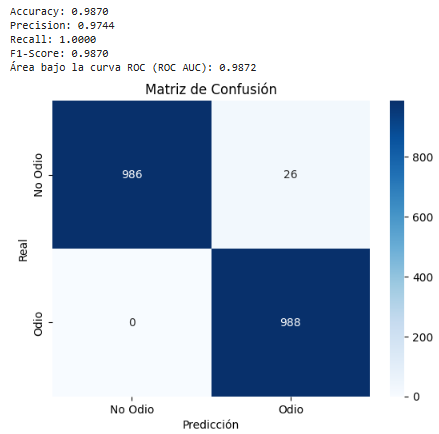

 COMPARATIVA